In [1]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


Simulate ball motion, find root where y=0 and snipe tmax to be time the ball hits the ground, recreating x and y accordingly.

In [2]:
def newtonRoot(f, fp, x0, accuracy=1.0e-6, max_steps = 200000, root_debug=False):
    f0 = f(x0)
    fp0 = fp(x0)
    if fp0 == 0.0:
        raise Exception(" root_tangent df/dx = 0 algorithm fails")
    dx = -f0/fp0
    step = 0
    if root_debug:
        root_print_header("Tangent Search", accuracy)
        root_print_step(step,x0,dx,f0)
    if f0 == 0.0:
        return x0
    while True:
        fp0 = fp(x0)
        if fp0 == 0.0:
            raise Exception(" root_tangent df/dx = 0 algorithm fails")
        dx = -f0/fp0
        x0 += dx
        f0 = f(x0)
        if abs(dx) <= accuracy or f0 == 0.0:
            return x0
        step += 1
        if step > max_steps:
            root_max_steps("root_tangent", max_steps)
        if root_debug:
            root_print_step(step,x0,dx,f0)
    return x0

In [3]:
def Cord(v,a,t):
    return v*t+0.5*a*t**2

In [4]:
tmax = 130
ax = 0
ay = -10
vx0 = 4
vy0 = 70
x0 = 0
y0 = 0

t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)

def CordRoot(t):
    return vy0*t+0.5*ay*t**2
def CordRootDeriv(t):
    return vy0+ay*t

endPoint = newtonRoot(CordRoot,CordRootDeriv,tmax*.1,tmax)

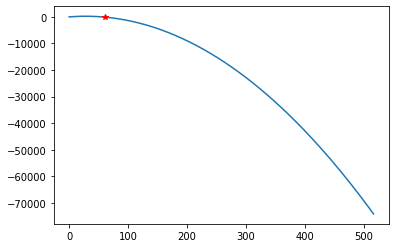

In [5]:
plt.plot(x,y)
plt.plot(x[round(endPoint)+1],0, 'r*')

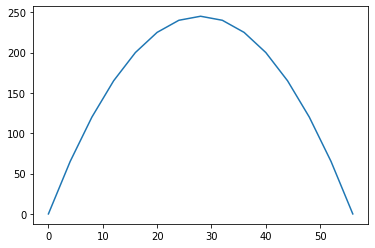

In [19]:
tmax = math.ceil(endPoint)
t = np.arange(tmax)
x = Cord(vx0,ax,t)
y = Cord(vy0,ay,t)
plt.plot(x,y)

Create Simulation Matrix of Ball Position

In [64]:
MATRIX = np.zeros((math.ceil(x[tmax-1])+1,math.ceil(y[round(tmax/2)])+10,tmax))

In [76]:
for i in range(tmax):
    MATRIX[int(x[i]),int(y[i]),i] = 1

In [77]:
print(np.nonzero(MATRIX))

(array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56]), array([  0,  65, 120, 165, 200, 225, 240, 245, 240, 225, 200, 165, 120,
        65,   0]), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))
